###### TP n°2 : Introduction à NumPy

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/1200px-Python_logo_and_wordmark.svg.png" width="256px" align="left"/>

La séance de TP précédente avait pour objectif de vous familiariser avec la syntaxe élémentaire en Python.
Bien que de base Python possède certaines capacités pour le calcul scientifique, ces dernières sont fortement limitées.
Il y a principalement deux raisons à cela :
- Dans sa version de base, Python ne possède aucune des fonctions nécessaires pour gérer le calcul matriciel, l'un des éléments les plus important pour le calcul scientifique.
- Même si il est possible d'écrire nous-même des fonctions Python pour effectuer ces calculs (cf. les exercices à la fin du dernier TP) notamment via l'utilisation de listes de listes, de telles fonctions sont incroyablement lentes en terme de vitesse d'exécution, une limitation majeure pour le calcul hautes performances.

Ces limitations ont conduit la communauté à développer des librairies (ou packages) additionnelles pour pouvoir effectuer ce type de calculs.
Plusieurs de ces packages existent, tels que [**NumPy**](https://numpy.org/) ou [**SciPy**](https://scipy.org/).
Dans la suite de ce TP et du cours, nous nous concentrerons sur l'usage de **NumPy**.

---

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/1280px-NumPy_logo_2020.svg.png" width="256px" align="left"/>

**NumPy** est une bibliothèque Python destinée à manipuler des matrices ou des tableaux multidimensionnels (appelés *array*).
Elle fournit également une ensemble de fonctions mathématiques opérant sur ces tableaux.
Bien qu'il s'agisse d'une bibliothèque Python, la plupart de ses fonctions sont écrites dans un langage de plus bas niveau tel que [Fortran](https://fr.m.wikipedia.org/wiki/Fortran) ou [C](https://fr.m.wikipedia.org/wiki/C_(langage)).
L'utilisation de tels langages pour la partie calculatoire permet de garantir d'excellentes performances tandis que l'interface Python simplifie fortement l'utilisation de ces fonctions.

Depuis la première version mise en accès libre en 1995, NumPy est devenu l'un des packages absolument incontournables pour le calcul scientifique en Python.
NumPy forme aujourd'hui la brique de base pour de très nombreux packages tels que
- [**SciPy**](https://scipy.org/) : bibliothèque pour le calcul scientifique plus avancé que NumPy.
- [**scikit-learn**](https://scikit-learn.org/) : bibliothèque de référence pour l'apprentissage machine et l'apprentissage statistique (Machine Learning et Statistical Learning).
- [**pandas**](https://pandas.pydata.org/) : bibliothèque très utilisée pour l'analyse et la manipulation de données.

Une fois couplé à ces différents packages, NumPy confère à Python de réelles capacités pour le calcul scientifique et le calcul hautes performances.
Pour des raisons évidentes de temps et de pédagogie, nous ne pourrons pas explorer toutes les possibilités offertes par NumPy.
L'objectif de ce TP est donc de vous familiariser uniquement avec la syntaxe de base de NumPy, notamment en ce qui concerne l'algèbre linéaire numérique.
Si jamais vous maîtriser déjà la programmation en MATLAB ou Octave, la page [NumPy for MATLAB users](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) pourra vous être d'une grande aide pour prendre en main NumPy plus rapidement.

Afin d'avoir accès à tout l'arsenal offert par NumPy, il est nécessaire de l'**importer** pour que Python puisse savoir comment accéder à ces fonctions.
Cela se fait par la ligne suivante que l'on mettra en général au tout début d'un script ou d'un notebook.

In [1]:
# --> Importation de NumPy dans l'espace mémoire de Python.
import numpy as np

Le fait d'importer NumPy en tant que `np` est une convention utilisée par quasiment toute la communauté.
NumPy offrant des fonctions telles que `max` ou `min`, cela permettra de les différencier d'autres fonctions ayant le même nom déjà disponibles dans Python ou dans d'autres packages que l'on utiliserait.
Ainsi, utiliser les fonctions `max` et `min` de NumPy se fera grâce aux commandes `np.max` et `np.min`.

Puisqu'un programme a souvent vocation à être partagé (avec vos collègues, vos clients, vos enseignants, etc), il peut être utile de savoir exactement quelle version de NumPy est utilisée.
La cellule ci-dessous vous montre comment récupérer le numéro de version.

In [2]:
np.__version__

'1.20.3'

Chaque nouvelle version vient avec sa dose de changements et de nouvelles fonctionalités.
Savoir exactement avec quelle version votre programme a été développé permet de s'assurer que, lorsqu'il est utilisé sur un autre ordinateur, la même version soit utilisée.
Garantir cela permet de s'assurer dans une certaine mesure que les résultats obtenus sont reproductibles et de donner confiance en votre travail.

NumPy se base par ailleurs sur deux bibliothèques Fortran/C, [BLAS](https://fr.wikipedia.org/wiki/Basic_Linear_Algebra_Subprograms) et [LAPACK](https://fr.wikipedia.org/wiki/LAPACK).
Tout comme NumPy, il existe plusieurs versions de ces deux librairies et il peut être utile de savoir quelles versions sont utilisées par votre installation.
Ces informations peuvent être obtenues à l'aide de la commande `np.show_config()` comme illustré ci-dessous.

In [3]:
np.show_config()

blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/loiseau/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/loiseau/anaconda3/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/loiseau/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/loiseau/anaconda3/include']
lapack_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/loiseau/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/loiseau/anaconda3/include']
lapack_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/home/loiseau/anaconda3/lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/home/loiseau/anaconda3/include']


La commande `np.show_config()` montre quelles versions de BLAS et LAPACK sont installées (CBLAS et MKL dans mon cas) ainsi que le chemin d'accès vers les sources de ces librairies.
Dans la plupart des cas, connaître ces informations n'est pas absolument nécessaire.
Cela peut s'avérer néanmoins utile encore une fois pour des raisons de reproducibilité de vos résultats à travers différentes machines et si des problèmes de performances sont observés (dans quel cas on installera une autre version de BLAS ou LAPACK).

---
---

## Python vs NumPy

Avant de rentrer dans le vif du sujet, illustrons les différences de performances entre du Python pur et le même calcul fait à l'aide de NumPy.
Pour cela, considérons le produit matrice-vecteur déjà étudié au TP précédent et pendant le cours.
Pour une matrice $\mathbf{A} \in \mathbb{R}^{m \times n}$ et un vecteur $\mathbf{x} \in \mathbf{R}^n$, on cherche donc à calculer le vecteur $\mathbf{y} \in \mathbb{R}^m$ tel que

$$
\mathbf{y} = \mathbf{Ax}.
$$

La cellule ci-dessous présente une telle implémentation en pure Python.
Elle peut être plus difficile à lire que la version naïve que vous avez probablement codé lors du dernier TP.
L'utilisation de la compréhension de liste permet notamment d'avoir quasiment les meilleurs performances possibles en Python pur.

In [4]:
def python_matvec(A, x):
    # --> Taille de la matrice.
    m, n = len(A), len(A[0])
    
    # --> Produit matrice-vecteur.
    y = [sum(A[i][j] * x[j] for j in range(n)) for i in range(m)]
    return y

Evaluons maintenant les performances de cette fonction pour une matrice $\mathbf{A}$ de taille 1000 $\times$ 1000, une matrice relativement petite en terme de calcul scientifique.

In [5]:
# --> Crée une matrice de taille 1000 x 1000 et un vecteur de taille 1000 x 1.
#     On utilise des fonctions NumPy dont on discutera plus tard pour se simplifier la vie.
A, x = np.random.randn(1000, 1000).tolist(), np.random.randn(1000).tolist()

In [6]:
%%timeit
python_matvec(A, x)

129 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Sur mon ordinateur personnel, cette fonction met environ 100ms pour effectuer ce calcul.
Voyons maintenant comment faire en NumPy.

In [7]:
A, x = np.random.randn(1000, 1000), np.random.randn(1000)
print(type(A))

<class 'numpy.ndarray'>


In [8]:
%%timeit
A @ x  # Calcul matrice-vecteur / matrice-matrice en NumPy.

627 µs ± 93.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


En utilisant la structure de données `np.array` de NumPy, ce même calcul nécessite environ 500µs sur mon ordinateur portable, presque 200 000 plus rapide que notre implémentation en Python pur.
Cet écart de performances sera d'autant plus important que l'on considère des matrices de grandes tailles!
La syntaxe est par ailleurs beaucoup plus simple, même si l'utilisation de `@` pour effectuer ce produit matrice-vecteur peut paraître contre-intuitif initialement.

On peut faire le même test en remplaçant cette fois-ci le produit matrice-vecteur par un produit matrice-matrice.
La fonction ci-dessous implémente cela en utilisant tous les trucs et astuces disponibles en Python pur.
Ne vous inquiétez donc pas si vous n'arrivez pas à la comprendre, nous n'utiliserons jamais ce genre d'implémentation.

In [9]:
def python_matmat(A, B):
    C = [[sum(x * y for x, y in zip(m1_r, m2_c)) for m2_c in zip(*B)] for m1_r in A]
    return C

In [10]:
# --> Crée deux matrice de taille 200 x 200.
A, B = np.random.randn(200, 200).tolist(), np.random.randn(200, 200).tolist()

In [11]:
%%timeit
python_matmat(A, B)

699 ms ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


En NumPy, le produit matrice-matrice s'effectue de la même façon que le produit matrice-vecteur.

In [12]:
# --> Crée deux matrice de taille 200 x 200.
A, B = np.random.randn(200, 200), np.random.randn(200, 200)

In [13]:
%%timeit
A @ B

270 µs ± 121 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Pour le produit de deux matrices de taille 200 $\times$ 200, l'implémentation NumPy est presque 2 millions de fois plus rapide que celle en Python pur.
Notez que nous nous sommes limités à des matrices de taille 200 $\times$ 200 et non 1000 $\times$ 1000 comme précédemment, ce calcul nécessitant plusieurs minutes en pur Python (contre quelques millisecondes à l'aide de NumPy).

Bien qu'extrêmement simplistes, ces deux exemples devraient suffire à vous convaincre de l'intérêt d'utiliser les possibilités offertes par NumPy pour le calcul scientifique en lieu et place d'implémentations faites en pur Python.
Ceci n'est qu'un tout petit aperçu des possibilités offertes par NumPy.
Vous trouverez ci-après deux exemples d'applications plus réalistes.
(**[Cliquez ici](#numpy_for_dummies) si vous souhaitez passer directement aux exercices.**)


---
---

## Exemples d'applications scientifiques à l'aide de NumPy

Vous trouverez ci-dessous deux exemples d'applications scientifiques reposant sur NumPy.
Ces exemples utilisent d'autres packages en plus de NumPy et les codes peuvent vous paraître à première vue incroyablement compliqués, notamment car ils reposent sur des mathématiques que vous n'avez sans doute encore jamais vues et que toutes les astuces possibles sont utilisées pour obtenir les meilleures performances possibles.
L'objectif n'est néanmoins pas que vous compreniez dans les détails ces codes mais de vous illustrer ce qu'il est possible de faire lorsque l'on maîtrise NumPy.

Ces deux exemples couvrent des domaines d'applications aussi variés que la mécanique des milieux continus (Ex. n°1 : modes propres d'oscillations d'une membrane 2D) ou le traitement de l'image (Ex n°2 : Content-aware image resizing) 
Pour chacun d'eux, une rapide explication du problème vous ait donnée suivie du code Python associé.
Pour les plus curieux d'entre vous, des liens vers des ressources en ligne sont donnés à chaque fois.

---

### Exemple n°1 : Calcul des modes propres d'oscillation d'une membrane carrée

La dynamique des oscillations dans une membrane bidimensionelle est décrite par l'équation d'onde suivante

$$
\dfrac{\partial^2 u}{\partial t^2} = \dfrac{\partial^2 u}{\partial x^2} + \dfrac{\partial^2 u}{\partial y^2}
$$

à laquelle on adjoint des conditions aux bords de la membrane (ici une membrane fixée à un support interdisant tout déplacement de ses extrémités).
La fonction $u(x, y, t)$ représente l'élévation de la membrane par rapport à son état d'équilibre.
Il est fort probable que vous ayez déjà rencontré la version 1D de ce problème au lycée lorsque vous avez travaillé sur le problème de la corde vibrante.

Dans ces problèmes de mécanique vibratoire, les modes propres sont parmis les choses les plus essentielles à calculer afin de caractériser au mieux la structure, et notamment les résonnances possibles.
En posant que les vibrations de la membrane sont de la forme

$$
u(x, y, t) = \hat{u}(x, y) \exp(-i\omega t)
$$

avec $\hat{u}(x, y) \in \mathbb{C}$ un mode propre est $\omega$ la fréquence d'oscillation associée, les modes propres correspondent aux fonctions propres solution du problème suivant

$$
\omega^2 \hat{u} = \dfrac{\partial^2 \hat{u}}{\partial x^2} + \dfrac{\partial^2 \hat{u}}{\partial y^2}.
$$

Bien que ces modes propres puissent être calculés analytiquement dans le cas d'une membrane carrée, nous illustrons comment faire ci-dessous à l'aide de Python.
Pour cela, nous utiliserons en lieu et place de NumPy le package SciPy, une version améliorée en quelque sorte.

En premier lieu, il est nécessaire d'approximer l'opérateur Laplacien (l'opérateur des dérivées secondes).
Pour cela nous utiliserons la [méthode des différences finies](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_diff%C3%A9rences_finies).
La membrane que l'on considère ci-après est un carré de côté $L = 1$ que l'on discrétisera à l'aide de 128 points dans chaque direction.
Une fois discrétisé, l'opérateur Laplacien est alors approximé à l'aide d'une matrice $\mathbf{L}$ de taille 16 384 $\times$ 16 384.

In [14]:
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import eigs

def laplacian_1d(L=1, nx=128):
    
    # --> Grid spacing.
    Δx = L/nx
    
    # --> 1D Laplace operator.
    diagonals = [np.ones(nx-1), -2*np.ones(nx), np.ones(nx-1)]
    L = diags(diagonals, [-1, 0, 1]) / Δx**2
    
    return L

def laplacian_2d(Lx=1, Ly=1, nx=128, ny=128):
    # --> Construct 1D Laplacians.
    Lx = laplacian_1d(Lx, nx)
    Ly = laplacian_1d(Ly, ny)
    
    Ix, Iy = eye(nx), eye(ny)
    
    # --> Construct 2D Laplacian.
    L = kron(Lx, Iy) + kron(Ix, Ly)
    
    return L

# --> Construct the 2D Laplace operator with default parameters.
L = laplacian_2d()

Le problème que l'on cherche alors à résoudre numériquement est le problème aux valeurs propres suivant

$$
\omega^2 \mathbf{u} = \mathbf{Lu}.
$$

La matrice $\mathbf{L}$ étant de très grande taille, il n'est pas possible de calculer toutes ses valeurs propres et ses vecteurs propres sont un PC tels que ceux auxquels vous avez accès.
Nous utiliserons alors un algorithme dit *itératif* qui permet de ne calculer que les modes propres qui nous intéresse.
Cela se fait grâce à la fonction `eigs` du module `scipy.sparse.linalg` comme illustré ci-dessous.

In [15]:
%time
# --> Compute the leading eigenvalues and eigenvectors.
Λ, vecs = eigs(L, k=16, which="LR", tol=1e-12)
idx = np.argsort(-Λ.real)
Λ, vecs = Λ[idx], vecs[:, idx]

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.29 µs


Malgré la taille du problème, ce calcul ne prend pas plus de quelques millisecondes sur mon ordinateur personnel.
La cellule ci-dessous permet de tracer de façon interactive les différents modes propres calculés.

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, widgets

def plot_eigenmode(vec):
    
    x = np.linspace(0, 1, 128+2)[1:-1]
    
    x, y = np.meshgrid(x, x)
    vec = vec.reshape(128, 128)
    
    fig, ax = plt.subplots(
        1, 1, 
        figsize=(6, 6),
        subplot_kw={"projection":"3d"}
    )
    
    ax.plot_surface(
        x, y, vec.real, 
        cmap=plt.cm.viridis,
        antialiased=False,
    )
    
    ax.axis("off")
    
    plt.show()
    
def show_eigenmode(idx=1):
    plot_eigenmode(vecs[:, idx-1])
interact(show_eigenmode, idx=(1, 16, 1));

interactive(children=(IntSlider(value=1, description='idx', max=16, min=1), Output()), _dom_classes=('widget-i…

Il est possible de sélectionner quel mode visualiser en jouant avec le curseur `idx`.
Si tout se passe bien, vous ne devriez pas avoir de mal à interpréter ce que vous voyez.

Bien que cela nécessite de plus amples connaissances en terme d'analyse et schéma numérique, sachez que la combinaison NumPy/SciPy permet d'étudier les vibrations de structures beaucoup plus complexes que cette simple membrane carrée.
Il est également possible de résoudre d'autres types d'équations aux dérivées partielles telles que les équations de Navier-Stokes en mécanique des fluides ou bien celle de Schrödinger en mécanique quantique.
Il est également possible à l'aide du module `scipy.integrate` de réaliser des simulations numériques de l'évolution de ces systèmes.
Un rapide exemple vous a été présenté en cours.

---

### Exemple n°2 : Redimensionner une image à l'aide du seam carving

Le second exemple est tiré du domaine de traitement de l'image.
Il s'agit de ce que l'on appelle le **recadrage intelligent** (ou seam carving en anglais).
Il s'agit d'un algorithme proposé en 2007 utilisé pour redimensionner de façon intelligente une image.
Au lieu de procéder par une simple mise à l'échelle, l'algorithme de seam carving procède par la suppresion ou l'addition de chemins de pixels dits de moindre énergie.
Pour plus de détails, le page [Wikipedia](https://fr.wikipedia.org/wiki/Seam_carving) est une bonne source.

La cellule ci-dessous télécharge une image souvent utilisée pour illustrer cet algorithme.

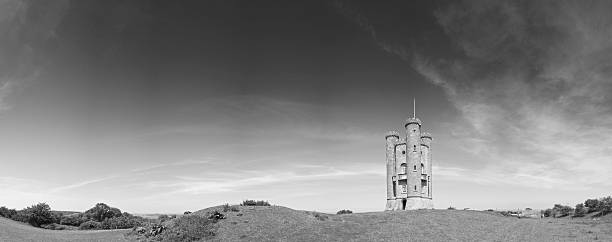

In [17]:
from PIL import Image as im
import requests
from io import BytesIO

# --> Image à télécharger.
#url = "https://img.grouponcdn.com/pwa_test/3Yif7m7sUAsSAdrWACDnTfJFiJo2/3Y-669x446/v1/c870x524.jpg"
#url = "https://upload.wikimedia.org/wikipedia/commons/8/8c/Broadway-tower-cotswolds.jpg"
url = "https://media.istockphoto.com/photos/english-views-picture-id104261826?k=20&m=104261826&s=612x612&w=0&h=wck6DuoYTz_fhJ1ABNwCJKz6ogkR3cRJBNpEuae5cYk="

# --> Téléchargement de l'image et la convertie en échelle de gris.
data = requests.get(url)
img = im.open(BytesIO(data.content)).convert("L")

# --> Petit utilitaire pour transformer un tableau NumPy en image.
np2pil = lambda x : im.fromarray((1-x).astype(np.uint8) * 255)

# --> Transforme l'image en un array numpy.
img = np.array(img, dtype=np.int32)

# --> Affiche l'image avec laquelle on travaillera.
h, w = img.shape
np2pil(img).resize((w, h))

Voyons maintenant à quoi ressemble l'image lorsque l'on essaye de la redimensionner dans la direction horizontale de façon relativement naïve.

In [18]:
def naive_resize(scale=1):
    h, w = img.shape
    return np2pil(img).resize((int(w*scale), h))
interact(naive_resize, scale=(0.5, 1, 0.05));

interactive(children=(FloatSlider(value=1.0, description='scale', max=1.0, min=0.5, step=0.05), Output()), _do…

Comme vous pouvez le voir, un redimensionnement naïf de l'image a tendance à distordre énormément les formes, et notamment le chateau dans le cas présent.
L'algorithme de seam carving, codé ci-dessous, essaye de rémédier à ce problème en utilisant une méthode d'optimisation connue sous le nom de [programmation dynamique](https://fr.wikipedia.org/wiki/Programmation_dynamique).

In [19]:
from scipy.ndimage import sobel
import numba

def compute_energy(img):
    """
    Calcul de la norme (pixel-wise) des gradients de l'image à l'aide du filtre de Sobel.
    """
    energy_map = np.abs(sobel(img, axis=0)) + np.abs(sobel(img, axis=1))
    return energy_map

@numba.jit(nopython=True, looplift=False, boundscheck=False, parallel=True)
def minimum_seam(M, backtrack):
    """
    Calcul du chemin d'énergie minimale via la programmation dynamique.
    """
    
    # --> Taille de l'image.
    r, c = M.shape

    # --> Dynamic programming.
    for i in numba.prange(1, r):
        for j in range(0, c):

            if j == 0:
                idx = np.argmin(M[i-1, j:j+2])
                backtrack[i, j] = idx + j
                min_energy = M[i-1, idx + j]
            else:
                idx = np.argmin(M[i-1, j-1:j+2])
                backtrack[i, j] = idx + j - 1
                min_energy = M[i-1, idx + j - 1]

            M[i, j] += min_energy

    return M, backtrack

def carve_column(img):
    """
    Retire l'équivalent d'une colonne de pixels de l'image grâce au Seam Carving.
    """
    
    # --> Taille de l'image.
    r, c = img.shape
    
    # --> Calcul du chemin de moindre énergie.
    M = compute_energy(img)
    backtrack = np.zeros_like(M, dtype=int)
    M, backtrack = minimum_seam(M, backtrack)
    
    # --> Retire les pixels marqués non-important de l'image.
    mask = np.ones((r, c), dtype=bool)

    j = np.argmin(M[-1])
    for i in reversed(range(r)):
        mask[i, j] = False
        j = backtrack[i, j]

    img = img[mask].reshape((r, c-1))

    return img

def seam_carve(img, scale=0.5):
    """
    Driver pour le seam carving.
    """
    
    # --> Taille de l'image actuelle.
    r, c = img.shape
    
    # --> Nouvelle taille souhaitée après redimensionnement.
    new_c = int(scale * c)

    # --> Redimensionnement par Seam Carving.
    for i in range(c - new_c):
        img = carve_column(img)

    return img


Voyons maintenant les résultats que l'on obtient lorsque l'on applique la méthode de seam carving à notre image.

In [20]:
def seam_carving(scale=1):
    output = seam_carve(img, scale=scale)
    h, w = output.shape
    return np2pil(output).resize((w, h))
interact(seam_carving, scale=(0.5, 1, 0.05));

interactive(children=(FloatSlider(value=1.0, description='scale', max=1.0, min=0.5, step=0.05), Output()), _do…

Comme vous pouvez le voir en jouant avec la barre de défilement, l'image redimensionnée est visuellement beaucoup plus agréable.
Relativement peu de distorsions sont générées.
Depuis qu'il a été publié par Shai Avidan et Ariel Shamir en 2007, l'algorithme de Seam Carving fait parti des fonctionnalités disponibles dans [Photoshop](https://fr.wikipedia.org/wiki/Adobe_Photoshop), [GIMP](https://fr.wikipedia.org/wiki/GIMP), [digiKAM](https://fr.wikipedia.org/wiki/DigiKam) ou encore [ImageMagick](https://fr.wikipedia.org/wiki/ImageMagick).
Sans le savoir, vous utilisez régulièrement cet algorithme.
En effet, il est utilisé dans beaucoup de sites web dit *réactifs* dont la conception vise à offrir une consultation confortable sur des écrans de tailles très différentes, notamment justement en redimensionnant les images affichées à l'écran!

---
---
<a id='numpy_for_dummies'></a>
## Numpy pour les débutants

Maintenant que nous avons deux exemples d'applications se basant sur NumPy, apprenons à l'utiliser.
De nombreux tutoriels sont disponibles en ligne pour compléter ce cours d'introduction.
Vous trouverez ci-dessous une liste non-exhaustive :
- [Introduction à NumPy](https://enacit.epfl.ch/cours/python/scientifique/numpy.html) par Samuel Bancal, enseignant-chercheur à l'Ecole Polytechnique Fédérale de Lausanne (Suisse).
- [Introduction to Numpy](https://jakevdp.github.io/PythonDataScienceHandbook/02.00-introduction-to-numpy.html) par Jake VanderPlas tiré du libre [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/).
- [Numerical Python](https://www.youtube.com/watch?v=sY1_SU1U_3E&list=PLQO9vKCRROdZkciP8FwS9SaQ1hlgy_wYt&ab_channel=GabeWeymouth) par [Gabe Weymouth](https://www.southampton.ac.uk/engineering/about/staff/gdw1d12.page), enseignant-chercheur à l'Université de South Hampton (Royaume-Uni). Il s'agit d'une playlist YouTube.
- [Scientific Computing in Python : Introduction to NumPy and Matploblib](https://sebastianraschka.com/blog/2020/numpy-intro.html) par Sebastian Raschka, enseignant-chercheur à l'Université de Wisconsin-Madison. Le site internet est accompagné d'une série de vidéos disponibles sur YouTube.

Pour les plus motivés d'entre vous, vous trouverez également ci-après une liste de livres pouvant vous être utiles si vous souhaitez maîtriser NumPy et le calcul scientifique en Python en général :
- [Python pour la physique](https://www.deboecksuperieur.com/ouvrage/9782807328907-python-pour-la-physique) par Richard Taillet, enseignant-chercheur en physique à l'Université Savoie Mont Blanc.
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) par [Jake VanderPlas](https://jakevdp.github.io/pages/about.html), chercheur à l'[eScience Institute](https://escience.washington.edu/) de l'Université de Washington( Seattle, USA).
- [SciPy and NumPy : an overview for developpers](https://www.amazon.com/SciPy-NumPy-Developers-Eli-Bressert/dp/1449305466) par Eli Bressert.
- [Learning NumPy Array](https://www.amazon.fr/Learning-NumPy-Array-Ivan-Idris/dp/1783983906) par Ivan Idris.
- [Numerical Python](https://www.amazon.fr/Numerical-Python-Scientific-Applications-Matplotlib/dp/1484242459) par Robert Johansson.

Ces listes sont loin d'être exhaustives et de très nombreuses ressources sont disponibles en ligne, nombre d'entre elles en accès libre.
Pour ce genre de recherche, Google est votre ami !

---

### Les arrays NumPy

Au début de ce notebook, nous avons illustré à quel point l'implémentation d'opérations aussi élémentaires que le produit matrice-vecteur ou le produit matrice-matrice pouvaient être performantes en NumPy comparées à des implémentations équivalentes en pur Python.
Une des raisons principales pour cet écart de performances est la structure de données utilisée.
Alors qu'une implémentation en pur Python utilise les **listes** comme structure de données de base, NumPy repose sur une nouvelle structure de données : les **ndarray**.

Cet objet *ndarray*, pour **N-dimensional array**, est l'élément central de la librairie NumPy.
Pour un utilisateur lambda, un *ndarray* est une structure de données relativement proche des *listes* Python classique à quelques différences près :

- Par défaut, tous les éléments dans un *ndarray* doivent être du même type, e.g. tous des `int` ou des `float`.
- Un array est de taille fixée. Contrairement à une liste, il n'est pas possible d'y ajouter de nouveaux éléments au fur à mesure ni de lui en retirer.

NumPy permet par ailleurs une gestion plus fine des types numériques.
Les principaux types diponibles sont les suivants :

</br>

<center>Les Booléens</center>

| Type | Description |
|---|---|
|`np.bool`| Booléen (`True` ou `False`)|

</br>

<center>Les nombres entiers</center>

| Type | Description |
|---|---|
| `np.int8` | Entier codé sur 8 bits (-128 à 127) |
| `np.int16` | Entier codé sur 16 bits (-32 768 à 32 767) |
| `np.int32` | Entier codé sur 32 bits ($2^{31}$ à $2^{31}-1$) |
| `np.int64` | Entier codé sur 64 bits ($2^{63}$ à $2^{63}-1$), défaut pour les entiers |

</br>

<center>Les nombres entiers (non-signés)</center>

| Type | Description |
|---|---|
| `np.uint8` | Entier non-signé sur 8 bits (0 à 255) |
| `np.uint16` | Entier non-signé sur 16 bits |
| `np.uint32` | Entier non-signé sur 32 bits |
| `np.uint64` | Entier non-signé sur 64 bits |

</br>

<center>Les nombres flottants (à virgule)</center>

| Type | Description |
|---|---|
| `np.float16` | Flottant (demi-précision) |
| `np.float32` | Flottant (simple précision) |
| `np.float64` | Floattant (double précision), défaut pour les flottants |


</br>

<center>Les nombres complexes</center>

| Type | Description |
|---|---|
| `np.complex64` | Complexe (simple précision) |
| `np.complex128` | Complexe (double précision), défaut pour les complexes |

Cette granularité dans le choix des types permet un contrôle plus fin de la mémoire allouée pour stocker les différentes variables nécessaires à un calcul.
Par exemple, pour une image où les couleurs utilisent le système [RGB](https://fr.wikipedia.org/wiki/Rouge_vert_bleu), chaque pixel sera stocké en mémoire à l'aide de trois entiers `np.uint8` : pour chacune des couleurs primaires, la valeur s'exprime dans un intervalle entre 0 et 255.
En calcul scientifique, on préférera en général utiliser des flottants double-précision (`np.float64`) permettant de décrire une gamme de nombres allant de $10^{-15}$ à $10^{15}$.
Avec l'avènement de l'intelligence artificielle et du Big Data, de plus en plus d'applications utilisent également la demi-précision (`np.float16`).

> &#9888;&#9888;&#9888; Utiliser des nombres codés sur moins de bits ne signifie par forcément que votre calcul se fera plus vite ! Cela dépend en effet fortement du matériel informatique que vous utilisez.
Les processeurs de la plupart des ordinateurs que vous utilisez sont par exemple optimisés pour faire des calculs avec des nombres codés sur 32 ou 64 bits.
Utiliser un type nécessitant moins de bits réduira l'espace mémoire nécessaire pour stocker vos données mais pourra conduire à des calculs plus lents !

Voyons voir maintenant comment créer ces *ndarray* et comment les manipuler.
Pour des raisons de simplicité, nous nous limiterons aux types par défaut, à savoir `np.int64` pour les nombres entiers, `np.float64` pour les nombres à virgules et `np.complex128` pour les nombres complexes.

In [21]:
# --> Crée un array x contenant les nombres 1, 2, 3, 4
x = np.array([1, 2, 3, 4])
print("Array x : ", x)

# --> Affiche le type des éléments de x.
print("Type : ", x.dtype)

Array x :  [1 2 3 4]
Type :  int64


La cellule ci-dessus illustre comment créer un array à une dimension contenant les nombres 1, 2, 3, et 4.
Puisqu'il s'agit de nombres entiers, le type par défaut utilisé sera `np.int64`.
Pour un connaître le type des données stockées dans un array `x`, vous pouvez utiliser `x.dtype`.
Il peut être utile de connaître d'autres attributs de l'array `x` tel que sa dimension, sa taille ou l'espace mémoire occupée.
Ceci est illustré ci-dessous.

In [22]:
# --> Affiche le nombre de dimension de x (ici 1.)
print("Nombre de dimensions :", x.ndim)

# --> Nombre d'éléments par dimension.
print("Nombre d'éléments par dimension :", x.shape)

# --> Nombre total d'éléments.
print("Nombre total d'éléments :", x.size)

# --> Espace mémoire occupé (en bytes).
print("Espace mémoire occupé (en bytes) :", x.nbytes)

# --> Espace mémoire occupé (en bits).
print("Espace mémoire occupé (en bits) :", 8*x.nbytes)

Nombre de dimensions : 1
Nombre d'éléments par dimension : (4,)
Nombre total d'éléments : 4
Espace mémoire occupé (en bytes) : 32
Espace mémoire occupé (en bits) : 256


Un *array* à deux dimensions, représentant typiquement un tableau de nombres ou une matrices, peut être créé tout aussi facilement.

In [23]:
# --> Crée un array à deux dimensions.
A = np.array([
    [1.1, 2.2, 3.3], 
    [4.4, 5.5, 6.6], 
    [7.7, 8.8, 9.9]])

# --> Affiche le type des éléments de A.
print("Type : ", A.dtype)

# --> Affiche le nombre de dimension de A (ici 2.)
print("Nombre de dimensions :", A.ndim)

# --> Nombre d'éléments par dimension.
print("Nombre d'éléments par dimension :", A.shape)

# --> Nombre total d'éléments.
print("Nombre total d'éléments :", A.size)

# --> Espace mémoire occupé (en bytes).
print("Espace mémoire occupé (en bytes) :", A.nbytes)

# --> Espace mémoire occupé (en bits).
print("Espace mémoire occupé (en bits) :", 8*A.nbytes)

Type :  float64
Nombre de dimensions : 2
Nombre d'éléments par dimension : (3, 3)
Nombre total d'éléments : 9
Espace mémoire occupé (en bytes) : 72
Espace mémoire occupé (en bits) : 576


#### Accéder aux éléments d'un tableau

Tout comme pour les listes, il est possible d'indexer les éléments d'un *array* pour les modifier ou les afficher.
Pour des *arrrays* à une dimension, la syntaxe est identitique aux listes comme montré ci-dessous.

In [24]:
print("Premier élément de x :", x[0])

print("Dernier élément de x :", x[-1])

print("Deuxième et troisième élément de x :", x[1:3])

Premier élément de x : 1
Dernier élément de x : 4
Deuxième et troisième élément de x : [2 3]


Pour des *arrays* à plusieurs dimensions, la syntaxe est plus légère que pour leur équivalents en terme de liste de listes.
Ainsi, tandis que l'élément $ij$ d'une liste de listes est récupéré à l'aide de `A[i][j]`, l'élement $ij$ d'un *array* à deux dimensions est récupéré à l'aide de `A[i, j]`.
Pour un tableau à 3 dimensions, on aurait alors `A[i][j][k]` en terme de liste de listes de listes et `A[i, j, k]` à l'aide de NumPy.

In [25]:
print("Première ligne de A :", A[0])

print("Dernière ligne de A :", A[-1])

print("Deuxième et troisième ligne de A :", A[1:3])

print()

print("Première colonne de A :", A[:, 0])

print("Dernière colonne de A :", A[:, -1])

print("Deuxième et troisième colonne de A :")
print(A[:, 1:3])

Première ligne de A : [1.1 2.2 3.3]
Dernière ligne de A : [7.7 8.8 9.9]
Deuxième et troisième ligne de A : [[4.4 5.5 6.6]
 [7.7 8.8 9.9]]

Première colonne de A : [1.1 4.4 7.7]
Dernière colonne de A : [3.3 6.6 9.9]
Deuxième et troisième colonne de A :
[[2.2 3.3]
 [5.5 6.6]
 [8.8 9.9]]


#### Création d'array fréquentes

NumPy fournit un ensemble de fonctions pour créer des *arrays* dont vous pourriez avoir besoin régulièrement.
Par exemple, il peut être nécessaire d'initialiser votre tableau de nombres avec des 0 partout avant de commencer votre calcul.
Cela peut se faire à l'aide la fonction suivante

```
np.zeros(shape, dtype=float)
```

où `shape` détermine la taille du tableau et `dtype` le type utilisé.

In [26]:
# --> [0, 0, 0, 0, 0, 0]
x = np.zeros(6)
print("Array de 0 à une dimension : \n\n", x, "\n")
print("Nombre de dimensions :", x.ndim)
print("Nombre d'éléments par dimension :", x.shape)
print("Type de données :", x.dtype, "\n\n -----\n\n")


# --> Array à deux dimensions.
print("Array de 0 à deux dimensions : \n\n", A := np.zeros((4, 4)), "\n")
print("Nombre de dimensions :", A.ndim)
print("Nombre d'éléments par dimension :", A.shape)
print("Type de données :", A.dtype, "\n\n -----\n\n")

# --> Array à deux dimensions.
print("Array de 0 à deux dimensions de nombres entiers : \n\n", A := np.zeros((4, 4), dtype=int), "\n")
print("Nombre de dimensions :", A.ndim)
print("Nombre d'éléments par dimension :", A.shape)


Array de 0 à une dimension : 

 [0. 0. 0. 0. 0. 0.] 

Nombre de dimensions : 1
Nombre d'éléments par dimension : (6,)
Type de données : float64 

 -----


Array de 0 à deux dimensions : 

 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 

Nombre de dimensions : 2
Nombre d'éléments par dimension : (4, 4)
Type de données : float64 

 -----


Array de 0 à deux dimensions de nombres entiers : 

 [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]] 

Nombre de dimensions : 2
Nombre d'éléments par dimension : (4, 4)


De la même façon, vous pouvez créer un tableau que de 1 à l'aide de la commande `np.ones(shape, dtype=float)`.

In [27]:
# --> Tableau ne contenant que des 1.
print("Array 1D ne contenant que des 1 : ", np.ones(4), "\n")
print("-----\n")

# --> Tableau 2D.
print("Array 2D ne contenant que des 1 : \n\n", np.ones((3, 3)), "\n")

Array 1D ne contenant que des 1 :  [1. 1. 1. 1.] 

-----

Array 2D ne contenant que des 1 : 

 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 



Si vous souhaitez initialiser le tableau avec une autre valeur, la fonction

```
np.full(shape, fill_value, dtype=None)
```

est à votre disposition.

In [28]:
print("Tableau 1D ne contenant que des 2 :", np.full(4, 2), "\n")
print("-----")

# --> Tableau 2D.
print("Array 2D ne contenant que le nombre pi : \n\n", np.full((3, 3), np.pi), "\n")

Tableau 1D ne contenant que des 2 : [2 2 2 2] 

-----
Array 2D ne contenant que le nombre pi : 

 [[3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265]
 [3.14159265 3.14159265 3.14159265]] 



Enfin, il peut être utile de créer des tableaux contenant tous les nombres (entiers ou floattant) compris dans un certain intervalle et avec un espacement particulier.
Pour les entiers, vous pouvez utiliser la fonction

```
np.arange([start, ] stop, [step, ])
```

où les arguments sont les suivants :
- `start` : valeur de début (facultatif, par défaut égal à 0).
- `stop` : valeur de fin (exclue).
- `step` : saut entre chaque valeur (facultatif, par défaut égal à 1).

Quelques exemples sont fournis ci-dessous.

In [29]:
# --> Tous les nombres compris entre 0 et 10 par pas de 1.
print( np.arange(11), "\n\n" )
print("-----\n")

# --> Tous les nombres compris entre 0 et 10 par pas de 2.
print( np.arange(0, 11, 2))

[ 0  1  2  3  4  5  6  7  8  9 10] 


-----

[ 0  2  4  6  8 10]


De la même façon, la fonction

```
np.linspace(start, stop, num=50, endpoint=True)
```

permet de retourner `num` floattants répartis uniformément dans l'intervalle [`start`, `stop`].

In [30]:
# --> Intervalle [0, 1] discrétisé avec 11 nombres.
print( np.linspace(0, 1, 11) )

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


Enfin, si vous avez besoin d'utiliser une répartition logarithmique des nombres, vous pouvez utiliser la fonction

```
np.logspace(start, stop, num=50, base=10.0)
```

où `base` défini la base du logarithmique utilisé, e.g.
- `base = 10` : utilise le logarithme classique, $\log_{10}(x) = \dfrac{\ln(x)}{\ln(10)}$.
- `base = 2` : utilise le logarithme en base 2, $\log_2(x) = \dfrac{\ln(x)}{\ln(2)}$.
- `base = b` : utilise le logarithme en base $b$, $\log_b(x) = \dfrac{\ln(x)}{\ln(b)}$ où $b$ est la base souhaitée.

Essayez dans la cellule ci-dessous d'utiliser la fonction `np.logspace` pour retourner l'array suivant

```
[1, 10, 100, 1000, 10000]
```

In [31]:
### BEGIN SOLUTION
np.logspace(0, 5, 6)
### END SOLUTION

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

Même question mais en considérant maintenant l'array suivante

```
[2, 4, 8, 16, 32, 64]
```

In [32]:
### BEGIN SOLUTION
np.logspace(1, 6, num=6, base=2)
### END SOLUTION

array([ 2.,  4.,  8., 16., 32., 64.])

#### Manipuler les arrays

Maintenant que nous savons comment créer des *arrays*, voyons comment les manipuler.
Nous avons déjà discuter de comment récupérer des éléments particuliers de l'*array* à l'aide de leur  index.
Il est néanmoins possible d'aller beaucoup plus loin.

##### Indexing avec un masque

Il peut être utile par moment de ne récupérer que les entrées d'un tableau vérifiant une certaine condition.
On utilisera pour cela un **masque booléen**, i.e. un tableau de la même taille que celui que l'on étudie mais ne contenant que des entrées `True` (si l'entrée vérifie la condition) ou `False` (si elle ne la vérifie pas).
Considérons par exemple le tableau suivant

```
x = np.arange(0, 101)
```

retournant tous les entiers compris entre 0 et 100.
Supposons maintenant que l'on ne souhaite choisir que les entiers divisible par 3.
On pourra alors le faire de la façon suivante

```
x[x % 3 == 0]
```

ce qui est équivalent à

```
mask = x % 3 == 0
x[mask]
```

In [33]:
# -->
x = np.arange(0, 101)

# -->
x[x % 3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
       51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])

##### Affectation indéxéee

Une fois que vous avez créé un *array*, il est possible d'en changer certaines des entrées à l'aide de leur index, par exemple

In [34]:
# --> Crée un array contenant les entiers de 0 à 9.
x = np.arange(10)
print("Array original :", x, "\n\n-----\n\n")

# --> Modification des entrées 3 à 4.
x[3:5] = 0
print("Array après modification :", x)

Array original : [0 1 2 3 4 5 6 7 8 9] 

-----


Array après modification : [0 1 2 0 0 5 6 7 8 9]


&#9888;&#9888;&#9888; En faisant cela, les nouvelles valeurs que vous affectez doivent être du même type que celui utilisé lorsque l'array a été créé !
Dans l'exemple ci-dessous, nous créons un arrray à l'aide de `np.linspace` qui sera par défaut de type `float`.
Supposons que l'on souhaite ensuite modifié la troisième entrée par le nombre complexe $1 + 2i$ (`1 + 1j*2` en Python).

In [35]:
# -->
x = np.linspace(0, 1, 11)

# -->
x[2] = 1 + 1j

TypeError: can't convert complex to float

Dans le cas présent NumPy rapportera une erreur.
Il est possible par moment que NumPy fassse du mieux qu'il peut sans pour autant causer des erreurs.
Votre code continuera à s'exécuter mais il ne fera pas nécessairement exactement ce que vous pensez qu'il est supposé faire.
Il faut donc faire très attention !

##### La transposée

Il est souvent nécessaire dans des calculs impliquant de l'algèbre linéaire d'avoir besoin d'utiliser la transposée d'une matrice ou d'un tenseur (i.e. un tableau à plus de deux dimensions).
Cela peut se faire très simplement en NumPy à l'aide de la fonction `np.transpose` où, si l'array a déjà été créé, à l'aide de `A.T` (pour un array `A`).

In [36]:
# --> Crée une matrice.
A = np.array([[1, 2], [3, 4]])
print("Matrice A : \n\n", A, "\n\n-----\n\n")

# --> Tranposée de la matrice.
print("Matrice A.T : \n\n", A.T, "\n\n")

Matrice A : 

 [[1 2]
 [3 4]] 

-----


Matrice A.T : 

 [[1 3]
 [2 4]] 




L'utilisation de la transposée pour des tableaux à plus deux dimensions est une opération mathématique assez subtile dont vous n'aurez que rarement besoin.
D'ici à ce que vous en ayez besoin, votre connaissance de Python et de NumPy ira bien au-delà de ce cours et nous n'en aborderons donc pas les subtilités ici.

---
### Opérations arithmétiques élémentaires `+`, `-`, `*`, `/`, `//`, `%`

NumPy fournit tous les opérateurs arithmétiques usuels pour additionner, soustraire, multiplier ou diviser deux tableaux de valeurs.
Attention, on parle ici d'opération appliquée à chaque élément des tableaux.
Les notions de multiplication et division matricielle (i.e. l'inverse) seront abordées plus tard.

#### L'addition `+`

In [37]:
# --> Crée deux arrays.
x, y = np.arange(10), np.arange(10, 20)
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait la somme des deux arrays.
z = x + y  # ou également np.add(x, y)
print("Résultat de l'opération x + y : ", z)

Premier array x : [0 1 2 3 4 5 6 7 8 9]
Deuxième array y : [10 11 12 13 14 15 16 17 18 19] 

-----


Résultat de l'opération x + y :  [10 12 14 16 18 20 22 24 26 28]


#### La soustraction `-`

In [38]:
# --> Crée deux arrays.
x, y = np.array([1, 2, 3, 4]), np.array([4, 10, 5, 3])
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait la différence des deux arrays.
z = x - y  # ou également np.subtract(x, y)
print("Résultat de l'opération x - y : ", z)

Premier array x : [1 2 3 4]
Deuxième array y : [ 4 10  5  3] 

-----


Résultat de l'opération x - y :  [-3 -8 -2  1]


#### La multiplication `*`

In [39]:
# --> Crée deux arrays.
x, y = np.array([1, 2, 3, 4]), np.array([4, 10, 5, 3])
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait la multiplication des deux arrays.
z = x * y  # ou également np.multiply(x, y)
print("Résultat de l'opération x * y : ", z)

Premier array x : [1 2 3 4]
Deuxième array y : [ 4 10  5  3] 

-----


Résultat de l'opération x * y :  [ 4 20 15 12]


&#9888;&#9888;&#9888; Contrairement à MATLAB, l'opérateur `*` ne correspond pas au produit matrice-matrice si on l'applique à des arrays à deux dimensions ! Il s'agit de la multiplication par élément (ou produit de Hadamard).

In [40]:
# --> Crée deux arrays.
A = np.array([[1, 2], [3, 4]])
B = np.array([[4, 5], [6, 7]])
print("Premier array x :\n\n", A)
print("Deuxième array y :\n\n", B, "\n\n-----\n\n")

# --> Fait la multiplication des deux arrays.
C = A * B  # ou également np.multiply(A, B)
print("Résultat de l'opération A * B:\n\n ", C)

Premier array x :

 [[1 2]
 [3 4]]
Deuxième array y :

 [[4 5]
 [6 7]] 

-----


Résultat de l'opération A * B:

  [[ 4 10]
 [18 28]]


Vous pouvez vérifier par vous-même que cette opération ne retourne en effet pas le produit matriciel de `A` et `B`.
Nous verrons comment faire dans la prochaine section.

#### Les différentes divisions `/`, `//` et `%`

In [41]:
# --> Crée deux arrays.
x, y = np.array([1, 2, 3, 4]), np.array([4, 10, 5, 3])
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait la division des deux arrays.
z = x / y  # ou également np.multiply(x, y)
print("Résultat de l'opération x / y : ", z)

Premier array x : [1 2 3 4]
Deuxième array y : [ 4 10  5  3] 

-----


Résultat de l'opération x / y :  [0.25       0.2        0.6        1.33333333]


In [42]:
# --> Crée deux arrays.
x, y = np.array([1, 2, 3, 4]), np.array([4, 10, 5, 3])
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait la division entière des deux arrays.
z = x // y
print("Résultat de l'opération x // y : ", z)

Premier array x : [1 2 3 4]
Deuxième array y : [ 4 10  5  3] 

-----


Résultat de l'opération x // y :  [0 0 0 1]


In [43]:
# --> Crée deux arrays.
x, y = np.array([1, 2, 3, 4]), np.array([4, 10, 5, 3])
print("Premier array x :", x)
print("Deuxième array y :", y, "\n\n-----\n\n")

# --> Fait le modulo des deux arrays.
z = x % y
print("Résultat de l'opération x % y : ", z)

Premier array x : [1 2 3 4]
Deuxième array y : [ 4 10  5  3] 

-----


Résultat de l'opération x % y :  [1 2 3 1]


#### &#9888;&#9888;&#9888; Attention au broadcasting !

Le terme de broadcasting décrit la façon dont numpy adapte deux objets scalaires ou ndarrays de géométrie différentes dans le but d’effectuer une opération entre elles.
Chaque axe est comparé, allant du dernier au premier. Celui de plus petite dimension est broadcasté jusqu’à obtenir la même dimension que le plus grand. Ainsi nous obtenons 2 objets de géométrie identique.
Pour plus de détails, vous pouvez vous reporter aux liens suivants [ici](https://enacit.epfl.ch/cours/python/scientifique/numpy.html#broadcasting) et [ici](https://numpy.org/doc/stable/user/basics.broadcasting.html).

---

### Universal Functions (ufunc)

[Voir le cours]()

---

### L'algèbre linéaire avec NumPy

L'un des intérêts principaux de NumPy est la possibilité qu'il offre de faire des calculs d'algèbre linéaire numérique tels que résoudre des systèmes d'équations ou rechercher les valeurs propres ou vecteurs propres d'une matrice.
Pour cela, nous utiliserons un sous-module de NumPy appelé `linalg` (pour *linear algebra* en anglais).
Dans la suite, nous importerons ce module comme montré ci-dessous.

In [44]:
import numpy.linalg as npl

Notez que le fait d'importer `numpy.linalg` en tant que `npl` est là pour simplifier l'appel aux fonctions dédiées.
Si vous avez déjà importer `numpy` en tant que `np`, vous pouvez si vous le voulez remplacer tous les appels à `npl` par `np.linalg`.

#### Produit scalaire

In [45]:
# --> Crée deux vecteurs de taille 5 avec des entrées aléatoires.
x, y = np.random.randn(5), np.random.randn(5)

# --> Produit scalaire
c = np.vdot(x, y)

print("Résultat de np.vdot(x, y) :", c)

Résultat de np.vdot(x, y) : 0.6468918226057695


#### Produit vectoriel

In [46]:
# --> 
x, y = np.array([1, 0, 0]), np.array([0, 1, 0])
print("Vecteurs dont on veut calculer le produit vectoriel :\n\n")
print("     x =", x)
print("     y =", y, "\n\n-----\n\n")

z = np.cross(x, y)
print("Résultat de np.cross(x, y) :", z)

Vecteurs dont on veut calculer le produit vectoriel :


     x = [1 0 0]
     y = [0 1 0] 

-----


Résultat de np.cross(x, y) : [0 0 1]


#### Norme d'un vecteur `np.linalg.norm`

In [47]:
# --> Crée un vecteur aléatoire.
x = np.random.randn(5)
print("Vecteur dont on cherche la norme :", x, "\n\n-----\n\n")

# --> Norme Euclidienne (i.e. \sqrt( x[0]^2 + x[1]^2 + ... + x[n]^2))
euclidienne = npl.norm(x)
print("Norme Euclidienne :", euclidienne)

# --> Norme ℓ1 (i.e. | x[0] | + | x[1] | + ... + | x[n] |)
l1 = npl.norm(x, ord=1)
print("Norme L1 :", l1)

Vecteur dont on cherche la norme : [ 1.63990341  1.2355228  -0.8924382  -0.95018394  0.33011242] 

-----


Norme Euclidienne : 2.4543979806992535
Norme L1 : 5.048160763660902


#### Produits matrice-vecteur et matrice-matrice

In [48]:
# --> Crée deux arrays.
A = np.array([[1, 2], [3, 4]])
B = np.array([[4, 5], [6, 7]])
print("Premier array A :\n\n", A)
print("Deuxième array B :\n\n", B, "\n\n-----\n\n")

# --> Fait la multiplication matricielle.
C = A @ B  # ou également np.dot(A, B)
print("Résultat de l'opération A @ B:\n\n ", C)

Premier array A :

 [[1 2]
 [3 4]]
Deuxième array B :

 [[4 5]
 [6 7]] 

-----


Résultat de l'opération A @ B:

  [[16 19]
 [36 43]]


#### Valeurs propres et vecteurs propres : `np.linalg.eigvals` et `np.eig`

Les valeurs propres et vecteurs propres d'une matrice $\mathbf{A}$ vérifient l'équation

$$
\mathbf{Ax}_i = \mathbf{x}_i \lambda_i.
$$

De nombreuses analyses nécessitent de les calculer.
NumPy fournit les fonctions `np.linalg.eigvals` (calcul des valeurs propres) et `np.linalg.eig` (calcul des valeurs propres ET des vecteurs propres) pour cela.

In [49]:
# --> Définie la matrice.
A = np.array([[1, 2], [3, 4]])
print("Matrice dont on cherche les valeurs propres :\n\n", A, "\n\n----\n\n")

# --> Calcul des valeurs propres.
valeurs_propres = npl.eigvals(A)
print("Valeurs propres :", valeurs_propres)

Matrice dont on cherche les valeurs propres :

 [[1 2]
 [3 4]] 

----


Valeurs propres : [-0.37228132  5.37228132]


In [50]:
# --> Définie la matrice.
A = np.array([[0, 1], [-1, 1]])
print("Matrice dont on cherche les valeurs propres et vecteurs propres :\n\n", A, "\n\n----\n\n")

# --> Calcul des valeurs propres et des vecteurs propres.
valeurs_propres, vecteurs_propres = npl.eig(A)
print("Valeurs propres :", valeurs_propres, "\n\n")
print("Matrice des vecteurs propres :\n\n", vecteurs_propres)

Matrice dont on cherche les valeurs propres et vecteurs propres :

 [[ 0  1]
 [-1  1]] 

----


Valeurs propres : [0.5+0.8660254j 0.5-0.8660254j] 


Matrice des vecteurs propres :

 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.35355339+0.61237244j 0.35355339-0.61237244j]]


Les vecteurs propres d'une matrice sont définis à une amplitude près.
Par convention, NumPy normalise chaque vecteur propre de façon à ce que sa norme soit égale à 1.

#### Inverse d'une matrice : `np.linalg.inv`

In [51]:
# --> Crée d'une matrice (array 2D).
A = np.array([[1, 2], [3, 4]])
print("Matirce dont on cherche l'inverse :\n\n", A, "\n\n-----\n\n")

# --> Calcul de l'inverse.
B = npl.inv(A)
print("Résultat de inv(A) :\n\n ", B, "\n\n")
print("Verificiation que A @ B = I :\n\n", A @ B)

Matirce dont on cherche l'inverse :

 [[1 2]
 [3 4]] 

-----


Résultat de inv(A) :

  [[-2.   1. ]
 [ 1.5 -0.5]] 


Verificiation que A @ B = I :

 [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]


#### Résolution de systèmes linéaires : `np.linalg.solve`

Il arrive souvent d'avoir à résoudre des systèmes linéaires du type

$$
\mathbf{Ax} = \mathbf{b}
$$

avec $\mathbf{A} \in \mathbb{R}^{n \times n}$, $\mathbf{b} \in \mathbb{R}^n$ et $\mathbf{x} \in \mathbb{R}^n$) ($\mathbb{R}$ peut également être remplacé par $\mathbb{C}$).
La solution à cette équation est donnée par

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}.
$$

On pourrait évidemment résoudre cette équation de la façon suivante

```
# --> Calcul de l'inverse.
Ainv = np.linalg.inv(A)

# --> Calcul de la solution.
x = Ainv @ b
```

Il est néanmoins fortement déconseillé de faire comme cela.
En effet, dans le cas général, le calcul de l'inverse d'une matrice de taille $n \times n$ nécessite $n^3$ opérations, un nombre qui peut devenir réellement astronomique.
A la place, il existe de très nombreux algorithmes qui peuvent être utilisés pour résoudre directement le problème sans avoir à nécessairement calculer l'inverse de la matrice : la [décomposition LU](https://fr.wikipedia.org/wiki/D%C3%A9composition_LU) pour une matrice générale, la [décomposition de Cholesky](https://fr.wikipedia.org/wiki/Factorisation_de_Cholesky) pour des matrices $\mathbf{A}$ symétriques définies positives, etc.
NumPy propose alors une interface unifiée via la fonction `np.linalg.solve(A, b)` comme illustré ci-après pour le problème suivant

$$
\left\{
\begin{aligned}
    2x + y & = 3 \\
    x + y & = 2
\end{aligned}
\right.
$$

dont la solution est donnée par le vecteur $\mathbf{x} = \begin{bmatrix} 1 & 1 \end{bmatrix}^T$.

In [52]:
# --> Matrice et terme de droite.
A = np.array([[2, 1], [1, 1]])
b = np.array([3, 2])

# --> Solution du problème.
x = npl.solve(A, b)
print("Solution du problème obtenue par NumPy x :", x)

Solution du problème obtenue par NumPy x : [1. 1.]


---
----

## Pour aller plus loin

En plus des aspects algèbre linéaire numérique, NumPy offre des fonctionalités de base pour générer des nombres aléatoires grâce au module `numpy.random` ainsi que pour faire des transformées de Fourier nécessaires pour le traitement du signal ou des images par exemple via le module `numpy.fft`.
Pour des contraintes de temps, il ne nous sera pas possible d'explorer les possibilités offertes par ces deux modules.
Je vous encourage très fortement à aller regarder la documentation NumPy associée pour vous faire une idée de ce qu'il est possible de faire avec.

---
---
<div class="alert alert-block alert-danger">
    <h2>Exercices notés</h2>
</div>

Vous trouverez ci-dessous une liste d'exercices.
Il est peu probable que vous ayez le temps de les faire pendant la séance.
Il s'agit donc essentiellement d'exercices à faire chez vous.
Attention, même si ils ne rentrent pas en compte dans votre note finale, ces exercices seront notés!
Cette note de TP sera utilisée pour juger en votre faveur ou défaveur si jamais il venait à vous manquer quelques points pour valider.
**Ces exercices sont également des exemples de ce qui pourrait vous attendre le jour de l'examen.**
A vous de voir à quel point vous êtes joueur/joueuse...